# ***PS4***

## **Question 1**

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np

hand_data_path = "./all-hands.dat" # constant for the path of the data

# load the data
hand_data = pd.read_csv(hand_data_path, header = None)
hand_data.head()

,0,1,2,3,4,5,6,7,8,9,...,134,135,136,137,138,139,140,141,142,143
0,296,509,305,481,329,465,350,443,365,417,...,136,369,141,407,152,442,153,477,142,511
1,284,511,299,488,321,471,335,449,348,426,...,127,369,131,406,140,442,141,477,126,510
2,293,510,310,490,328,472,340,450,352,427,...,126,375,130,410,137,444,145,476,133,507
3,310,506,323,483,345,466,359,443,372,419,...,143,375,148,411,158,445,165,479,156,511
4,334,509,351,490,369,472,381,449,392,427,...,160,377,165,412,174,444,185,476,181,509


### **(a)**

In [15]:
"""
This function calculates the mean of each column
and separates them into two numpy arrays where one
correlates with the x-axis and the other with the
y-axis.
@data = the data to feed into the function

"""
def calculate_means(data):
  m = data.shape[1] # number of "examples"
  n = data.shape[0] # number of datapoints

  # creates 72 x 1 np.arrays that stores the means
  x_axis_np = np.ones(shape = ((int)(m/2), 1))
  y_axis_np = np.ones(shape = ((int)(m/2), 1))
  index_to_add = 0 # keep track of the index

  # loop through all the "examples"
  for col in range(m):
    column = data.loc[:, col]
    sum = 0

    # loops through all the points
    for row in range(n):
      sum += data.loc[row, col]

    # take the average and place in correct array
    avg = sum / n
    if col % 2 == 0: # if the column is even then put in x[index]
      x_axis_np[index_to_add] = avg
    else:
      y_axis_np[index_to_add] = avg
      index_to_add += 1 # increment index_to_add since everytime there is an odd index, both x and y arrays have filled at the same index location

  return x_axis_np, y_axis_np

x_axis_np, y_axis_np = calculate_means(hand_data)

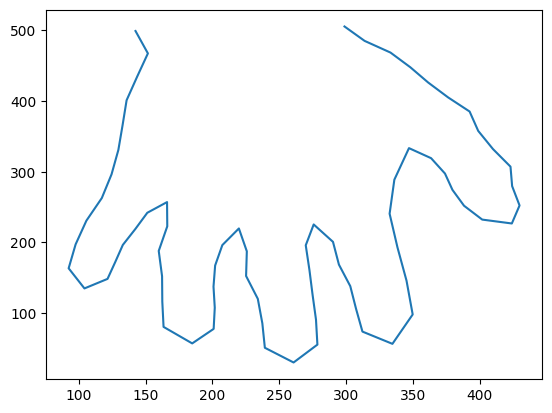

In [16]:
import matplotlib.pyplot as plt
import matplotlib.axes as ax

plt.plot(x_axis_np, y_axis_np)

## **Resources**

https://numpy.org/
